# Graphical Visualization for Recipe Ratings

### Which State Has the Highest Rated Foods?
A project to visualize the various ratings of dishes across the states of the U.S.

#### Tools Used:
-Folium

-JSON

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
path = r'C:\Users\steve\Documents\CF - Achieve_6'

In [3]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [4]:
# Importing JSON file to draw the US states
country_geo = os.path.join(path, 'Data', 'us-states.json')

In [5]:
df = pd.read_excel(os.path.join(path, 'Data', 'AdidasDataset_Cleaned.xlsx'))

#### Checking DF For Necessary Cleaning

In [6]:
df.head()

,Unnamed: 0,retailer,invoice,region,state,city,product,price_per_unit,units_sold,income,profit,profit_margin,sales_method
0,0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [7]:
# Quick check for null values
df.isnull().sum()

Unnamed: 0        0
retailer          0
invoice           0
region            0
state             0
city              0
product           0
price_per_unit    0
units_sold        0
income            0
profit            0
profit_margin     0
sales_method      0
dtype: int64

No null values, we are good to go.

In [8]:
# Creating temp df to count dupes
dups = df.duplicated()

In [9]:
dups.shape

(9644,)

No dupes either, looking good.

## Prechecks Before Visualization

Performing a few checks to make sure there are no extreme values or anything out of the ordinary.  Also digging for some insights and possible discoveries.

<Axes: xlabel='price_per_unit', ylabel='Count'>

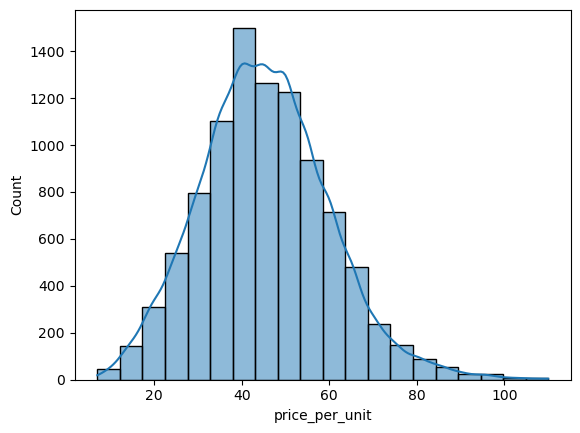

In [10]:
# Checking histogram of price_per_unit
sns.histplot(df['price_per_unit'], bins=20, kde=True)

<Axes: xlabel='profit', ylabel='Count'>

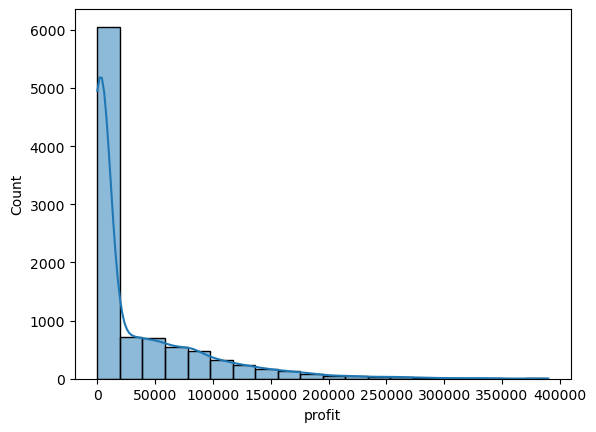

In [11]:
# Creating a histogram of profits
sns.histplot(df['profit'], bins=20, kde=True)

<Axes: xlabel='profit_margin', ylabel='Count'>

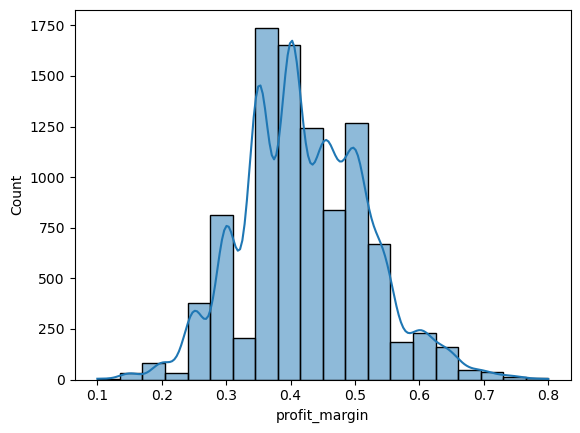

In [12]:
# Creating a historgram of profit margins, as there are a lot of low end profits
sns.histplot(df['profit_margin'], bins=20, kde=True)

<Axes: xlabel='income', ylabel='Count'>

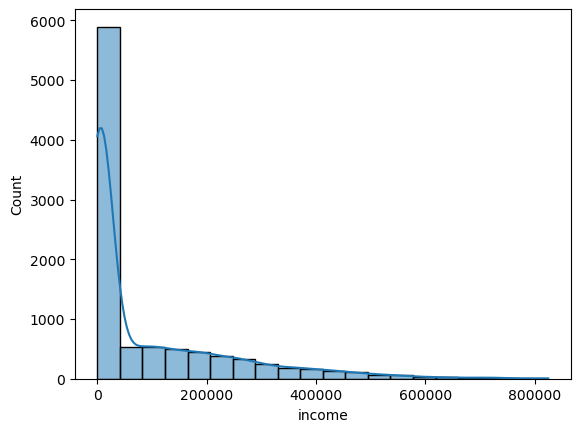

In [13]:
# Margin looks fine-ish, checking income to see if it is similar to profits
sns.histplot(df['income'], bins=20, kde=True)

In [14]:
# The charts are consistent, to be safe, I want to look at the numbers and make sure they are not odd
df[df['income'] <50000]

,Unnamed: 0,retailer,invoice,region,state,city,product,price_per_unit,units_sold,income,profit,profit_margin,sales_method
293,293,Foot Locker,2021-06-09,Midwest,Illinois,Chicago,Women's Athletic Footwear,40.0,100,40000.0,16000.00,0.40,Outlet
299,299,Foot Locker,2021-06-15,Midwest,Illinois,Chicago,Women's Athletic Footwear,45.0,75,33750.0,13500.00,0.40,Outlet
305,305,Foot Locker,2021-06-21,Midwest,Illinois,Chicago,Women's Athletic Footwear,45.0,75,33750.0,13500.00,0.40,Outlet
431,431,Foot Locker,2021-10-25,South,Texas,Dallas,Women's Athletic Footwear,40.0,75,30000.0,12000.00,0.40,Outlet
437,437,Foot Locker,2021-10-31,Northeast,Pennsylvania,Philadelphia,Women's Athletic Footwear,40.0,50,20000.0,8000.00,0.40,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,9643,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9640,9644,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9641,9645,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9642,9646,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [15]:
# Creating a temp table to get a count, it may be possible its an outlet related occurance?
check_df=df[df['income'] < 50000]

In [16]:
check_df['sales_method'].value_counts()

sales_method
Online      3932
Outlet      1920
In-store     108
Name: count, dtype: int64

In [17]:
df['sales_method'].value_counts()

sales_method
Online      4887
Outlet      3017
In-store    1740
Name: count, dtype: int64

In [18]:
# Checking states, its possible its simply low population states?
check_df['state'].value_counts()

state
Texas             289
California        288
Florida           217
New York          216
Rhode Island      157
Oklahoma          156
Arkansas          151
Connecticut       150
Pennsylvania      149
Utah              147
Massachusetts     146
Tennessee         145
Alabama           145
Virginia          144
Vermont           144
Nevada            144
Idaho             144
Oregon            144
Louisiana         144
Mississippi       144
New Mexico        144
Georgia           144
Arizona           144
New Hampshire     144
Nebraska           96
Wisconsin          89
Iowa               89
Minnesota          87
Maryland           85
Kansas             84
North Dakota       83
Indiana            80
South Dakota       78
New Jersey         77
West Virginia      77
Maine              77
Kentucky           75
Illinois           75
Delaware           74
Missouri           74
Wyoming            72
Hawaii             72
Alaska             72
Montana            72
South Carolina     72
Nort

In [19]:
# City does not appear to be a factor either, taking a look at products
check_df['product'].value_counts()

product
Women's Athletic Footwear    1060
Women's Street Footwear      1009
Men's Apparel                 986
Men's Athletic Footwear       981
Women's Apparel               963
Men's Street Footwear         961
Name: count, dtype: int64

In [20]:
# Above numbers looked normal, comparing it to the overall data
df['product'].value_counts()

product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Men's Apparel                1606
Women's Athletic Footwear    1602
Name: count, dtype: int64

### Insight:
The income and profit charts match, and the numbers appear to be normal, they are just not as high as some of the other locations.  With that said, there was no oddities like income being lower than profit.  It does appear that instore locations make more profits when compared to online and outlet sources.  This could be due to people spending more once they see a product in person, more exposure to products to try on, etc.

## Creating Geographical Visualization

In [21]:
# creating data frame for plotting, using state and profit
plot_df = df[['state', 'profit']]
plot_df.head()

,state,profit
0,New York,300000.0
1,New York,150000.0
2,New York,140000.0
3,New York,133875.0
4,New York,162000.0


In [22]:
# Setup a folium map, centered on the US
map = folium.Map(location = [39, -98], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo,
    data = plot_df,
    columns = ['state', 'profit'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity = 0.6, line_opacity = 0.2,
    legend_name = 'Amount of Profits'
).add_to(map)
folium.LayerControl().add_to(map)

map

In [23]:
map.save(os.path.join(path,'Visualizations','map_of_profts_states.html'))

### Insights:
Surprisingly, the most profitable states are New York, Washington, Illinois, and Nebraska.  While the first two are expected, the latter half was not what I would have predicted.  Even odder is that big states like California and Texas are the least profitable.

Now we know which states are the most and least profitable, we must wonder why such large population states bring up the lower end of the profitability.  We can explore that by comparing the number of sales between the states.  Additionally, if we can find a city JSON file, we can create a similar map to view each city’s performance.  There are other questions I would like to look at, but I believe comparison charts would be better suited than a geographic map for those purposes.
